In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from tqdm import tqdm
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
data=[]
label = []
height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

In [3]:
for i in tqdm(range(classes)):
    path="Train/{}/".format(i)
    #print(path)
    cl = os.listdir(path)
    for x in cl:
        try:
            img=cv2.imread(path+x)
            image = cv2.resize(img,(height,width))
            data.append(image)
            label.append(i)
        except:
            pass

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:09<00:00,  6.70it/s]


In [4]:
x = np.array(data)

In [5]:
x = x/255.0
y= to_categorical(label,classes)

In [6]:
x.shape

(39209, 30, 30, 3)

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [8]:
del data

In [9]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.models import Sequential

In [10]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(height,width,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.2))

model.add(Dense(43, activation='softmax'))


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
from keras.callbacks import EarlyStopping
early = EarlyStopping(monitor='val_loss',mode='min',patience='5',verbose=1)


In [14]:
model.fit(X_train,Y_train,epochs=15,batch_size=30,validation_data=(X_test,Y_test),verbose=1)


Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - ETA: 27:54 - loss: 3.7495 - accuracy: 0.033 - ETA: 3:34 - loss: 3.7698 - accuracy: 0.037 - ETA: 1:49 - loss: 3.7373 - accuracy: 0.05 - ETA: 1:14 - loss: 3.6861 - accuracy: 0.05 - ETA: 57s - loss: 3.6731 - accuracy: 0.0490 - ETA: 46s - loss: 3.6542 - accuracy: 0.048 - ETA: 38s - loss: 3.6425 - accuracy: 0.048 - ETA: 34s - loss: 3.6326 - accuracy: 0.048 - ETA: 30s - loss: 3.6246 - accuracy: 0.051 - ETA: 27s - loss: 3.6227 - accuracy: 0.050 - ETA: 24s - loss: 3.6108 - accuracy: 0.052 - ETA: 22s - loss: 3.6023 - accuracy: 0.052 - ETA: 21s - loss: 3.5957 - accuracy: 0.051 - ETA: 19s - loss: 3.5936 - accuracy: 0.052 - ETA: 18s - loss: 3.5846 - accuracy: 0.052 - ETA: 17s - loss: 3.5799 - accuracy: 0.054 - ETA: 16s - loss: 3.5746 - accuracy: 0.055 - ETA: 15s - loss: 3.5653 - accuracy: 0.057 - ETA: 15s - loss: 3.5585 - accuracy: 0.058 - ETA: 14s - loss: 3.5541 - accuracy: 0.058 - ETA: 13s

31367/31367 [==============================] - ETA: 11s - loss: 1.2956 - accuracy: 0.633 - ETA: 7s - loss: 1.0217 - accuracy: 0.677 - ETA: 7s - loss: 0.9868 - accuracy: 0.69 - ETA: 6s - loss: 0.9770 - accuracy: 0.69 - ETA: 6s - loss: 0.9533 - accuracy: 0.69 - ETA: 6s - loss: 0.9355 - accuracy: 0.69 - ETA: 6s - loss: 0.9490 - accuracy: 0.69 - ETA: 6s - loss: 0.9430 - accuracy: 0.69 - ETA: 6s - loss: 0.9341 - accuracy: 0.69 - ETA: 6s - loss: 0.9268 - accuracy: 0.69 - ETA: 6s - loss: 0.9245 - accuracy: 0.69 - ETA: 6s - loss: 0.9167 - accuracy: 0.69 - ETA: 6s - loss: 0.9136 - accuracy: 0.70 - ETA: 6s - loss: 0.9167 - accuracy: 0.69 - ETA: 6s - loss: 0.9093 - accuracy: 0.69 - ETA: 6s - loss: 0.9106 - accuracy: 0.70 - ETA: 6s - loss: 0.9220 - accuracy: 0.69 - ETA: 6s - loss: 0.9238 - accuracy: 0.69 - ETA: 5s - loss: 0.9159 - accuracy: 0.70 - ETA: 5s - loss: 0.9143 - accuracy: 0.70 - ETA: 5s - loss: 0.9115 - accuracy: 0.70 - ETA: 5s - loss: 0.9106 - accuracy: 0.70 - ETA: 5s - loss: 0.9060 - a

31367/31367 [==============================] - ETA: 8s - loss: 0.7911 - accuracy: 0.66 - ETA: 6s - loss: 0.5185 - accuracy: 0.82 - ETA: 6s - loss: 0.4598 - accuracy: 0.85 - ETA: 6s - loss: 0.4666 - accuracy: 0.85 - ETA: 6s - loss: 0.4655 - accuracy: 0.85 - ETA: 6s - loss: 0.4346 - accuracy: 0.86 - ETA: 6s - loss: 0.4284 - accuracy: 0.86 - ETA: 5s - loss: 0.4463 - accuracy: 0.85 - ETA: 5s - loss: 0.4432 - accuracy: 0.85 - ETA: 5s - loss: 0.4487 - accuracy: 0.85 - ETA: 5s - loss: 0.4555 - accuracy: 0.85 - ETA: 5s - loss: 0.4566 - accuracy: 0.85 - ETA: 5s - loss: 0.4593 - accuracy: 0.85 - ETA: 5s - loss: 0.4632 - accuracy: 0.85 - ETA: 5s - loss: 0.4631 - accuracy: 0.85 - ETA: 5s - loss: 0.4559 - accuracy: 0.85 - ETA: 5s - loss: 0.4633 - accuracy: 0.85 - ETA: 5s - loss: 0.4550 - accuracy: 0.85 - ETA: 5s - loss: 0.4524 - accuracy: 0.85 - ETA: 5s - loss: 0.4514 - accuracy: 0.85 - ETA: 5s - loss: 0.4486 - accuracy: 0.85 - ETA: 5s - loss: 0.4484 - accuracy: 0.86 - ETA: 5s - loss: 0.4471 - accu

31367/31367 [==============================] - ETA: 9s - loss: 0.1809 - accuracy: 0.93 - ETA: 7s - loss: 0.2866 - accuracy: 0.91 - ETA: 7s - loss: 0.2898 - accuracy: 0.90 - ETA: 7s - loss: 0.3197 - accuracy: 0.90 - ETA: 7s - loss: 0.3188 - accuracy: 0.90 - ETA: 7s - loss: 0.3276 - accuracy: 0.90 - ETA: 7s - loss: 0.3036 - accuracy: 0.90 - ETA: 7s - loss: 0.3130 - accuracy: 0.90 - ETA: 7s - loss: 0.3157 - accuracy: 0.90 - ETA: 7s - loss: 0.3130 - accuracy: 0.90 - ETA: 7s - loss: 0.3075 - accuracy: 0.90 - ETA: 6s - loss: 0.3095 - accuracy: 0.90 - ETA: 6s - loss: 0.3096 - accuracy: 0.90 - ETA: 6s - loss: 0.3109 - accuracy: 0.90 - ETA: 6s - loss: 0.3101 - accuracy: 0.90 - ETA: 6s - loss: 0.3020 - accuracy: 0.90 - ETA: 6s - loss: 0.3013 - accuracy: 0.90 - ETA: 6s - loss: 0.2956 - accuracy: 0.91 - ETA: 6s - loss: 0.2962 - accuracy: 0.91 - ETA: 6s - loss: 0.2955 - accuracy: 0.90 - ETA: 6s - loss: 0.2947 - accuracy: 0.90 - ETA: 6s - loss: 0.2944 - accuracy: 0.90 - ETA: 6s - loss: 0.2928 - accu

31367/31367 [==============================] - ETA: 9s - loss: 0.5817 - accuracy: 0.83 - ETA: 7s - loss: 0.3909 - accuracy: 0.86 - ETA: 7s - loss: 0.3390 - accuracy: 0.88 - ETA: 6s - loss: 0.3017 - accuracy: 0.90 - ETA: 7s - loss: 0.2887 - accuracy: 0.90 - ETA: 6s - loss: 0.2816 - accuracy: 0.90 - ETA: 6s - loss: 0.2724 - accuracy: 0.91 - ETA: 6s - loss: 0.2655 - accuracy: 0.91 - ETA: 6s - loss: 0.2639 - accuracy: 0.91 - ETA: 6s - loss: 0.2682 - accuracy: 0.91 - ETA: 6s - loss: 0.2648 - accuracy: 0.91 - ETA: 6s - loss: 0.2568 - accuracy: 0.91 - ETA: 6s - loss: 0.2583 - accuracy: 0.91 - ETA: 6s - loss: 0.2546 - accuracy: 0.91 - ETA: 6s - loss: 0.2567 - accuracy: 0.91 - ETA: 6s - loss: 0.2568 - accuracy: 0.91 - ETA: 6s - loss: 0.2561 - accuracy: 0.91 - ETA: 6s - loss: 0.2548 - accuracy: 0.91 - ETA: 6s - loss: 0.2580 - accuracy: 0.91 - ETA: 6s - loss: 0.2579 - accuracy: 0.91 - ETA: 6s - loss: 0.2595 - accuracy: 0.91 - ETA: 6s - loss: 0.2603 - accuracy: 0.91 - ETA: 5s - loss: 0.2541 - accu

31367/31367 [==============================] - ETA: 11s - loss: 0.0984 - accuracy: 1.000 - ETA: 7s - loss: 0.2211 - accuracy: 0.937 - ETA: 7s - loss: 0.2063 - accuracy: 0.94 - ETA: 7s - loss: 0.2196 - accuracy: 0.93 - ETA: 7s - loss: 0.2170 - accuracy: 0.93 - ETA: 6s - loss: 0.2149 - accuracy: 0.93 - ETA: 6s - loss: 0.2084 - accuracy: 0.93 - ETA: 6s - loss: 0.1980 - accuracy: 0.93 - ETA: 6s - loss: 0.2094 - accuracy: 0.93 - ETA: 6s - loss: 0.2100 - accuracy: 0.93 - ETA: 6s - loss: 0.2145 - accuracy: 0.93 - ETA: 6s - loss: 0.2116 - accuracy: 0.93 - ETA: 6s - loss: 0.2062 - accuracy: 0.93 - ETA: 6s - loss: 0.2081 - accuracy: 0.93 - ETA: 6s - loss: 0.2173 - accuracy: 0.93 - ETA: 6s - loss: 0.2247 - accuracy: 0.93 - ETA: 6s - loss: 0.2220 - accuracy: 0.93 - ETA: 5s - loss: 0.2222 - accuracy: 0.93 - ETA: 5s - loss: 0.2178 - accuracy: 0.93 - ETA: 5s - loss: 0.2191 - accuracy: 0.93 - ETA: 5s - loss: 0.2176 - accuracy: 0.93 - ETA: 5s - loss: 0.2168 - accuracy: 0.93 - ETA: 5s - loss: 0.2136 - a

31367/31367 [==============================] - ETA: 10s - loss: 0.5369 - accuracy: 0.866 - ETA: 6s - loss: 0.2568 - accuracy: 0.923 - ETA: 6s - loss: 0.2420 - accuracy: 0.93 - ETA: 6s - loss: 0.2234 - accuracy: 0.93 - ETA: 6s - loss: 0.2046 - accuracy: 0.93 - ETA: 6s - loss: 0.1958 - accuracy: 0.94 - ETA: 6s - loss: 0.1977 - accuracy: 0.94 - ETA: 6s - loss: 0.1898 - accuracy: 0.94 - ETA: 6s - loss: 0.1879 - accuracy: 0.94 - ETA: 6s - loss: 0.1927 - accuracy: 0.94 - ETA: 6s - loss: 0.1875 - accuracy: 0.94 - ETA: 5s - loss: 0.1937 - accuracy: 0.94 - ETA: 5s - loss: 0.1920 - accuracy: 0.94 - ETA: 5s - loss: 0.1872 - accuracy: 0.94 - ETA: 5s - loss: 0.1825 - accuracy: 0.94 - ETA: 5s - loss: 0.1880 - accuracy: 0.94 - ETA: 5s - loss: 0.1897 - accuracy: 0.94 - ETA: 5s - loss: 0.1946 - accuracy: 0.94 - ETA: 5s - loss: 0.1976 - accuracy: 0.94 - ETA: 5s - loss: 0.2018 - accuracy: 0.93 - ETA: 5s - loss: 0.2044 - accuracy: 0.93 - ETA: 5s - loss: 0.2009 - accuracy: 0.93 - ETA: 5s - loss: 0.1995 - a

31367/31367 [==============================] - ETA: 9s - loss: 0.1735 - accuracy: 0.96 - ETA: 7s - loss: 0.2190 - accuracy: 0.94 - ETA: 7s - loss: 0.1915 - accuracy: 0.95 - ETA: 7s - loss: 0.1826 - accuracy: 0.95 - ETA: 7s - loss: 0.1666 - accuracy: 0.95 - ETA: 6s - loss: 0.1642 - accuracy: 0.95 - ETA: 6s - loss: 0.1631 - accuracy: 0.95 - ETA: 6s - loss: 0.1633 - accuracy: 0.94 - ETA: 6s - loss: 0.1630 - accuracy: 0.94 - ETA: 6s - loss: 0.1626 - accuracy: 0.94 - ETA: 6s - loss: 0.1656 - accuracy: 0.94 - ETA: 6s - loss: 0.1627 - accuracy: 0.94 - ETA: 6s - loss: 0.1577 - accuracy: 0.95 - ETA: 6s - loss: 0.1608 - accuracy: 0.94 - ETA: 6s - loss: 0.1636 - accuracy: 0.94 - ETA: 6s - loss: 0.1585 - accuracy: 0.95 - ETA: 6s - loss: 0.1544 - accuracy: 0.95 - ETA: 6s - loss: 0.1490 - accuracy: 0.95 - ETA: 6s - loss: 0.1518 - accuracy: 0.95 - ETA: 6s - loss: 0.1522 - accuracy: 0.95 - ETA: 6s - loss: 0.1514 - accuracy: 0.95 - ETA: 6s - loss: 0.1505 - accuracy: 0.95 - ETA: 6s - loss: 0.1480 - accu

31367/31367 [==============================] - ETA: 7s - loss: 0.0676 - accuracy: 0.96 - ETA: 6s - loss: 0.2153 - accuracy: 0.95 - ETA: 6s - loss: 0.1867 - accuracy: 0.95 - ETA: 6s - loss: 0.1816 - accuracy: 0.94 - ETA: 6s - loss: 0.1953 - accuracy: 0.94 - ETA: 6s - loss: 0.1934 - accuracy: 0.94 - ETA: 6s - loss: 0.1938 - accuracy: 0.94 - ETA: 6s - loss: 0.1939 - accuracy: 0.94 - ETA: 6s - loss: 0.1857 - accuracy: 0.95 - ETA: 6s - loss: 0.1834 - accuracy: 0.95 - ETA: 6s - loss: 0.1839 - accuracy: 0.95 - ETA: 6s - loss: 0.1790 - accuracy: 0.95 - ETA: 6s - loss: 0.1762 - accuracy: 0.95 - ETA: 5s - loss: 0.1693 - accuracy: 0.95 - ETA: 5s - loss: 0.1693 - accuracy: 0.95 - ETA: 5s - loss: 0.1702 - accuracy: 0.95 - ETA: 5s - loss: 0.1709 - accuracy: 0.94 - ETA: 5s - loss: 0.1690 - accuracy: 0.94 - ETA: 5s - loss: 0.1696 - accuracy: 0.94 - ETA: 5s - loss: 0.1685 - accuracy: 0.95 - ETA: 5s - loss: 0.1641 - accuracy: 0.95 - ETA: 5s - loss: 0.1628 - accuracy: 0.95 - ETA: 5s - loss: 0.1656 - accu

31367/31367 [==============================] - ETA: 9s - loss: 0.0858 - accuracy: 0.96 - ETA: 7s - loss: 0.1780 - accuracy: 0.93 - ETA: 6s - loss: 0.1714 - accuracy: 0.94 - ETA: 6s - loss: 0.1898 - accuracy: 0.94 - ETA: 6s - loss: 0.1719 - accuracy: 0.94 - ETA: 6s - loss: 0.1792 - accuracy: 0.94 - ETA: 6s - loss: 0.1746 - accuracy: 0.94 - ETA: 6s - loss: 0.1718 - accuracy: 0.94 - ETA: 6s - loss: 0.1634 - accuracy: 0.94 - ETA: 6s - loss: 0.1572 - accuracy: 0.95 - ETA: 6s - loss: 0.1638 - accuracy: 0.94 - ETA: 6s - loss: 0.1622 - accuracy: 0.94 - ETA: 6s - loss: 0.1615 - accuracy: 0.95 - ETA: 5s - loss: 0.1561 - accuracy: 0.95 - ETA: 5s - loss: 0.1579 - accuracy: 0.95 - ETA: 5s - loss: 0.1622 - accuracy: 0.94 - ETA: 5s - loss: 0.1649 - accuracy: 0.94 - ETA: 5s - loss: 0.1658 - accuracy: 0.94 - ETA: 5s - loss: 0.1656 - accuracy: 0.94 - ETA: 5s - loss: 0.1643 - accuracy: 0.94 - ETA: 5s - loss: 0.1639 - accuracy: 0.94 - ETA: 5s - loss: 0.1633 - accuracy: 0.94 - ETA: 5s - loss: 0.1621 - accu

31367/31367 [==============================] - ETA: 8s - loss: 0.0246 - accuracy: 1.00 - ETA: 6s - loss: 0.1019 - accuracy: 0.96 - ETA: 6s - loss: 0.0966 - accuracy: 0.96 - ETA: 6s - loss: 0.0809 - accuracy: 0.97 - ETA: 6s - loss: 0.0951 - accuracy: 0.97 - ETA: 6s - loss: 0.0985 - accuracy: 0.97 - ETA: 6s - loss: 0.1025 - accuracy: 0.97 - ETA: 6s - loss: 0.0970 - accuracy: 0.97 - ETA: 6s - loss: 0.1076 - accuracy: 0.96 - ETA: 6s - loss: 0.1205 - accuracy: 0.96 - ETA: 6s - loss: 0.1208 - accuracy: 0.96 - ETA: 6s - loss: 0.1196 - accuracy: 0.96 - ETA: 6s - loss: 0.1266 - accuracy: 0.96 - ETA: 6s - loss: 0.1255 - accuracy: 0.96 - ETA: 6s - loss: 0.1201 - accuracy: 0.96 - ETA: 5s - loss: 0.1185 - accuracy: 0.96 - ETA: 5s - loss: 0.1205 - accuracy: 0.96 - ETA: 5s - loss: 0.1198 - accuracy: 0.96 - ETA: 5s - loss: 0.1195 - accuracy: 0.96 - ETA: 5s - loss: 0.1209 - accuracy: 0.96 - ETA: 5s - loss: 0.1245 - accuracy: 0.96 - ETA: 5s - loss: 0.1264 - accuracy: 0.96 - ETA: 5s - loss: 0.1275 - accu

31367/31367 [==============================] - ETA: 8s - loss: 0.0879 - accuracy: 0.93 - ETA: 6s - loss: 0.1402 - accuracy: 0.94 - ETA: 6s - loss: 0.1481 - accuracy: 0.95 - ETA: 6s - loss: 0.1403 - accuracy: 0.95 - ETA: 6s - loss: 0.1303 - accuracy: 0.96 - ETA: 6s - loss: 0.1275 - accuracy: 0.96 - ETA: 6s - loss: 0.1290 - accuracy: 0.96 - ETA: 6s - loss: 0.1273 - accuracy: 0.96 - ETA: 6s - loss: 0.1210 - accuracy: 0.96 - ETA: 6s - loss: 0.1241 - accuracy: 0.96 - ETA: 6s - loss: 0.1232 - accuracy: 0.96 - ETA: 5s - loss: 0.1249 - accuracy: 0.96 - ETA: 5s - loss: 0.1226 - accuracy: 0.96 - ETA: 5s - loss: 0.1240 - accuracy: 0.96 - ETA: 5s - loss: 0.1240 - accuracy: 0.96 - ETA: 5s - loss: 0.1305 - accuracy: 0.96 - ETA: 5s - loss: 0.1297 - accuracy: 0.96 - ETA: 5s - loss: 0.1281 - accuracy: 0.96 - ETA: 5s - loss: 0.1294 - accuracy: 0.96 - ETA: 5s - loss: 0.1305 - accuracy: 0.96 - ETA: 5s - loss: 0.1290 - accuracy: 0.96 - ETA: 5s - loss: 0.1271 - accuracy: 0.96 - ETA: 5s - loss: 0.1264 - accu

31367/31367 [==============================] - ETA: 9s - loss: 0.2078 - accuracy: 0.90 - ETA: 7s - loss: 0.1056 - accuracy: 0.96 - ETA: 6s - loss: 0.1600 - accuracy: 0.95 - ETA: 6s - loss: 0.1488 - accuracy: 0.95 - ETA: 6s - loss: 0.1336 - accuracy: 0.96 - ETA: 6s - loss: 0.1218 - accuracy: 0.96 - ETA: 6s - loss: 0.1123 - accuracy: 0.96 - ETA: 6s - loss: 0.1183 - accuracy: 0.96 - ETA: 5s - loss: 0.1217 - accuracy: 0.96 - ETA: 5s - loss: 0.1177 - accuracy: 0.96 - ETA: 5s - loss: 0.1139 - accuracy: 0.96 - ETA: 5s - loss: 0.1127 - accuracy: 0.96 - ETA: 5s - loss: 0.1108 - accuracy: 0.96 - ETA: 5s - loss: 0.1115 - accuracy: 0.96 - ETA: 5s - loss: 0.1098 - accuracy: 0.96 - ETA: 5s - loss: 0.1125 - accuracy: 0.96 - ETA: 5s - loss: 0.1109 - accuracy: 0.96 - ETA: 5s - loss: 0.1122 - accuracy: 0.96 - ETA: 5s - loss: 0.1154 - accuracy: 0.96 - ETA: 5s - loss: 0.1125 - accuracy: 0.96 - ETA: 5s - loss: 0.1158 - accuracy: 0.96 - ETA: 5s - loss: 0.1154 - accuracy: 0.96 - ETA: 5s - loss: 0.1179 - accu

31367/31367 [==============================] - ETA: 8s - loss: 0.0278 - accuracy: 1.00 - ETA: 6s - loss: 0.1029 - accuracy: 0.97 - ETA: 6s - loss: 0.1029 - accuracy: 0.97 - ETA: 6s - loss: 0.1301 - accuracy: 0.96 - ETA: 6s - loss: 0.1359 - accuracy: 0.96 - ETA: 6s - loss: 0.1251 - accuracy: 0.96 - ETA: 6s - loss: 0.1296 - accuracy: 0.96 - ETA: 6s - loss: 0.1270 - accuracy: 0.96 - ETA: 6s - loss: 0.1295 - accuracy: 0.96 - ETA: 5s - loss: 0.1217 - accuracy: 0.96 - ETA: 5s - loss: 0.1256 - accuracy: 0.96 - ETA: 5s - loss: 0.1267 - accuracy: 0.96 - ETA: 5s - loss: 0.1263 - accuracy: 0.96 - ETA: 5s - loss: 0.1261 - accuracy: 0.96 - ETA: 5s - loss: 0.1285 - accuracy: 0.96 - ETA: 5s - loss: 0.1307 - accuracy: 0.96 - ETA: 5s - loss: 0.1367 - accuracy: 0.96 - ETA: 5s - loss: 0.1387 - accuracy: 0.96 - ETA: 5s - loss: 0.1356 - accuracy: 0.96 - ETA: 5s - loss: 0.1333 - accuracy: 0.96 - ETA: 5s - loss: 0.1328 - accuracy: 0.96 - ETA: 5s - loss: 0.1356 - accuracy: 0.96 - ETA: 5s - loss: 0.1365 - accu

31367/31367 [==============================] - ETA: 7s - loss: 0.4437 - accuracy: 0.86 - ETA: 6s - loss: 0.1061 - accuracy: 0.96 - ETA: 6s - loss: 0.1290 - accuracy: 0.95 - ETA: 6s - loss: 0.1089 - accuracy: 0.96 - ETA: 6s - loss: 0.1073 - accuracy: 0.96 - ETA: 6s - loss: 0.1125 - accuracy: 0.96 - ETA: 6s - loss: 0.1247 - accuracy: 0.96 - ETA: 6s - loss: 0.1185 - accuracy: 0.96 - ETA: 6s - loss: 0.1210 - accuracy: 0.96 - ETA: 6s - loss: 0.1176 - accuracy: 0.96 - ETA: 5s - loss: 0.1168 - accuracy: 0.96 - ETA: 5s - loss: 0.1131 - accuracy: 0.96 - ETA: 5s - loss: 0.1093 - accuracy: 0.96 - ETA: 5s - loss: 0.1100 - accuracy: 0.96 - ETA: 5s - loss: 0.1134 - accuracy: 0.96 - ETA: 5s - loss: 0.1138 - accuracy: 0.96 - ETA: 5s - loss: 0.1145 - accuracy: 0.96 - ETA: 5s - loss: 0.1155 - accuracy: 0.96 - ETA: 5s - loss: 0.1203 - accuracy: 0.96 - ETA: 5s - loss: 0.1218 - accuracy: 0.96 - ETA: 5s - loss: 0.1213 - accuracy: 0.96 - ETA: 5s - loss: 0.1222 - accuracy: 0.96 - ETA: 5s - loss: 0.1240 - accu

In [15]:
model.save("GTSRB")

In [16]:
del x
del y

In [17]:
df = pd.DataFrame(model.history.history)

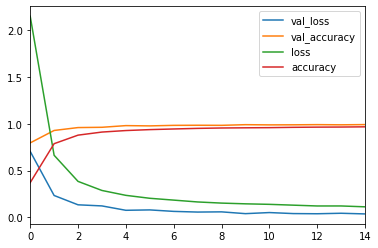

In [18]:
df.plot()

In [27]:
y_test = pd.read_csv("Test.csv")
labels = y_test['Path'].values
y_test = y_test['ClassId'].values

In [28]:
y_data=[]

In [30]:
for i in labels:
    
    img = cv2.imread(i)
    image = cv2.resize(img,(height,width))
    y_data.append(image)

In [32]:
y_data=np.array(y_data)
y_data = y_data/255.0

In [33]:
pred = model.predict_classes(y_data)


In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9543942992874109

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        60
           1       0.98      0.97      0.98       720
           2       0.97      0.96      0.96       750
           3       0.95      0.96      0.95       450
           4       0.98      0.97      0.98       660
           5       0.93      0.97      0.95       630
           6       0.99      0.87      0.93       150
           7       0.99      0.95      0.97       450
           8       0.96      0.97      0.96       450
           9       0.98      1.00      0.99       480
          10       1.00      0.98      0.99       660
          11       0.90      0.94      0.92       420
          12       1.00      0.90      0.95       690
          13       0.99      0.99      0.99       720
          14       1.00      0.99      1.00       270
          15       0.87      1.00      0.93       210
          16       0.83      1.00      0.91       150
          17       1.00    

In [38]:
print(confusion_matrix(y_test, pred))

[[ 60   0   0 ...   0   0   0]
 [ 12 698   2 ...   0   0   0]
 [  0   6 718 ...   0   0   0]
 ...
 [  0   0   0 ...  88   0   0]
 [  0   0   0 ...   0  51   0]
 [  0   0   0 ...   0   0  89]]
